In [1]:
import mne
import os 
import numpy as np
import pandas as pd

In [67]:
path = r"E:\Crossling_EEG\R0783_20220429_Crossling"
file=os.path.join(path,"R0783_20220429_Crossling_0005.vhdr")

raw=mne.io.read_raw_brainvision(file, preload=True)

Extracting parameters from E:\Crossling_EEG\R0783_20220429_Crossling\R0783_20220429_Crossling_0005.vhdr...
Setting channel info structure...
Reading 0 ... 1609769  =      0.000 ...  3219.538 secs...


C:\Users\LG\AppData\Local\Temp\ipykernel_29640\1027198442.py:4: RuntimeWarning: No coordinate information found for channels ['AUD']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw=mne.io.read_raw_brainvision(file, preload=True)
C:\Users\LG\AppData\Local\Temp\ipykernel_29640\1027198442.py:4: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw=mne.io.read_raw_brainvision(file, preload=True)
C:\Users\LG\AppData\Local\Temp\ipykernel_29640\1027198442.py:4: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw=mne.io.read_raw_brainvision(file, preload=True)
C:\Users\LG\AppData\Local\Temp\ipykernel_29640\1027198442.py:4: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['VEOG', 'AUD']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calli

In [4]:
aud = raw.copy()
aud.pick_channels(['AUD']) # separate AUD

<RawBrainVision | R078_20220426_Crossling_0002.eeg, 1 x 1669900 (3339.8 s), ~12.8 MB, data loaded>

In [68]:
raw=raw.filter(0.1, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)



In [69]:
%matplotlib qt
raw.plot(scalings=dict(eeg=100e-6));

Opening raw-browser...
Closing raw-browser...
Channels marked as bad:
none


In [70]:
raw.set_channel_types(mapping={'VEOG': 'eog'});

C:\Users\LG\AppData\Local\Temp\ipykernel_29640\2720685280.py:1: RuntimeWarning: The unit for channel(s) VEOG has changed from C to V.
  raw.set_channel_types(mapping={'VEOG': 'eog'});


In [17]:
raw.info['bads'].append('Fp2')

In [ ]:
raw.interpolate_bads(reset_bads=False)

In [71]:
filt_raw = raw.copy().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



In [72]:
ica = mne.preprocessing.ICA(n_components=25, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Omitting 1426 of 1609770 (0.09%) samples, retaining 1608344 (99.91%) samples.
Selecting by number: 25 components
Fitting ICA took 103.2s.


Method,fastica
Fit,59 iterations on raw data (1608344 samples)
ICA components,25
Explained variance,99.8 %
Available PCA components,31
Channel types,eeg
ICA components marked for exclusion,—


In [73]:
filt_raw.load_data()
ica.plot_sources(filt_raw, show_scrollbars=True);

Creating RawArray with float64 data, n_channels=26, n_times=1609770
    Range : 0 ... 1609769 =      0.000 ...  3219.538 secs
Ready.
Opening ica-browser...


In [74]:
ica.plot_components()

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x260 with 5 Axes>]

In [12]:
ica.plot_overlay(filt_raw, exclude=[0,1], picks='eeg', start=908., stop=915.);

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 2 ICA components
    Projecting back using 31 PCA components


In [76]:
#ica.exclude = [0, 1] #R780
#ica.exclude = [0, 1, 2] #R781
#ica.exclude = [0, 1, 2] #R782
ica.exclude = [1, 2, 6] #R783
#ica.exclude = [0, 1, 2] #R784
#ica.exclue = [0, 1] #R785

In [77]:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 31 PCA components


<RawBrainVision | R0783_20220429_Crossling_0005.eeg, 33 x 1609770 (3219.5 s), ~405.3 MB, data loaded>

In [78]:
reconst_raw.plot(scalings=dict(eeg=25e-6));

Opening raw-browser...
Closing raw-browser...
Channels marked as bad:
none


In [14]:
reconst_raw.save("E:/Crossling_EEG/R0785_raw.fif", overwrite=False)

Writing E:\Crossling_EEG\R0785_raw.fif
Closing E:\Crossling_EEG\R0785_raw.fif
[done]


In [40]:
reconst_raw=mne.io.read_raw_fif("E:\Crossling_EEG\R0782_raw.fif")

Opening raw data file E:\Crossling_EEG\R0782_raw.fif...
    Range : 0 ... 1652739 =      0.000 ...  3305.478 secs
Ready.


In [16]:
%matplotlib qt
reconst_raw.plot()

Opening raw-browser...


# AUD

In [15]:
events = mne.events_from_annotations(reconst_raw)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 17', 'Stimulus/S 18', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S 26', 'Stimulus/S 27', 'Stimulus/S 28', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33', 'Stimulus/S 34', 'Stimulus/S 35', 'Stimulus/S 36', 'Stimulus/S 37', 'Stimulus/S 38', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 43', 'Stimulus/S 44', 'Stimulus/S 45', 'Stimulus/S 46', 'Stimulus/S 47', 'Stimulus/S 48', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 54', 'Stimulus/S 55', 'Stimulus/S 56', 'Stimulus/S 57', 'Stimulus/S 58', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64', 'Stimulus/S 65', 'Stimulus/S 66', 'Stimulus/S 67', 'Stimulus/S 68', 'Stimulus/S 71', 'Stimulus/S 72', 'Stimulus/S 73', 'Stimulus/S 74', 'Stimulus/S 75', 'Stimulus/S 76', 'Stimulus/S 77', 

In [16]:
events=events[0]

Mark onset for each sound

In [25]:
%matplotlib qt
aud.plot(duration=30)
#fig = aud.plot(duration=30)
#fig.fake_keypress('a')

Opening raw-browser...


Closing raw-browser...
Channels marked as bad:
none


In [26]:
aud.save("G:\My Drive\Research\Decoding\EEG\R0785_aud_raw.fif", overwrite=True)

Overwriting existing file.
Writing G:\My Drive\Research\Decoding\EEG\R0785_aud_raw.fif
Closing G:\My Drive\Research\Decoding\EEG\R0785_aud_raw.fif
[done]


In [79]:
#aud=mne.io.read_raw_fif("E:\Crossling_EEG\R0782_aud_raw.fif")
aud=mne.io.read_raw_fif("G:\My Drive\Research\Decoding\EEG\R0783_aud_raw.fif")

Opening raw data file G:\My Drive\Research\Decoding\EEG\R0783_aud_raw.fif...
    Range : 0 ... 1609769 =      0.000 ...  3219.538 secs
Ready.


Opening raw-browser...


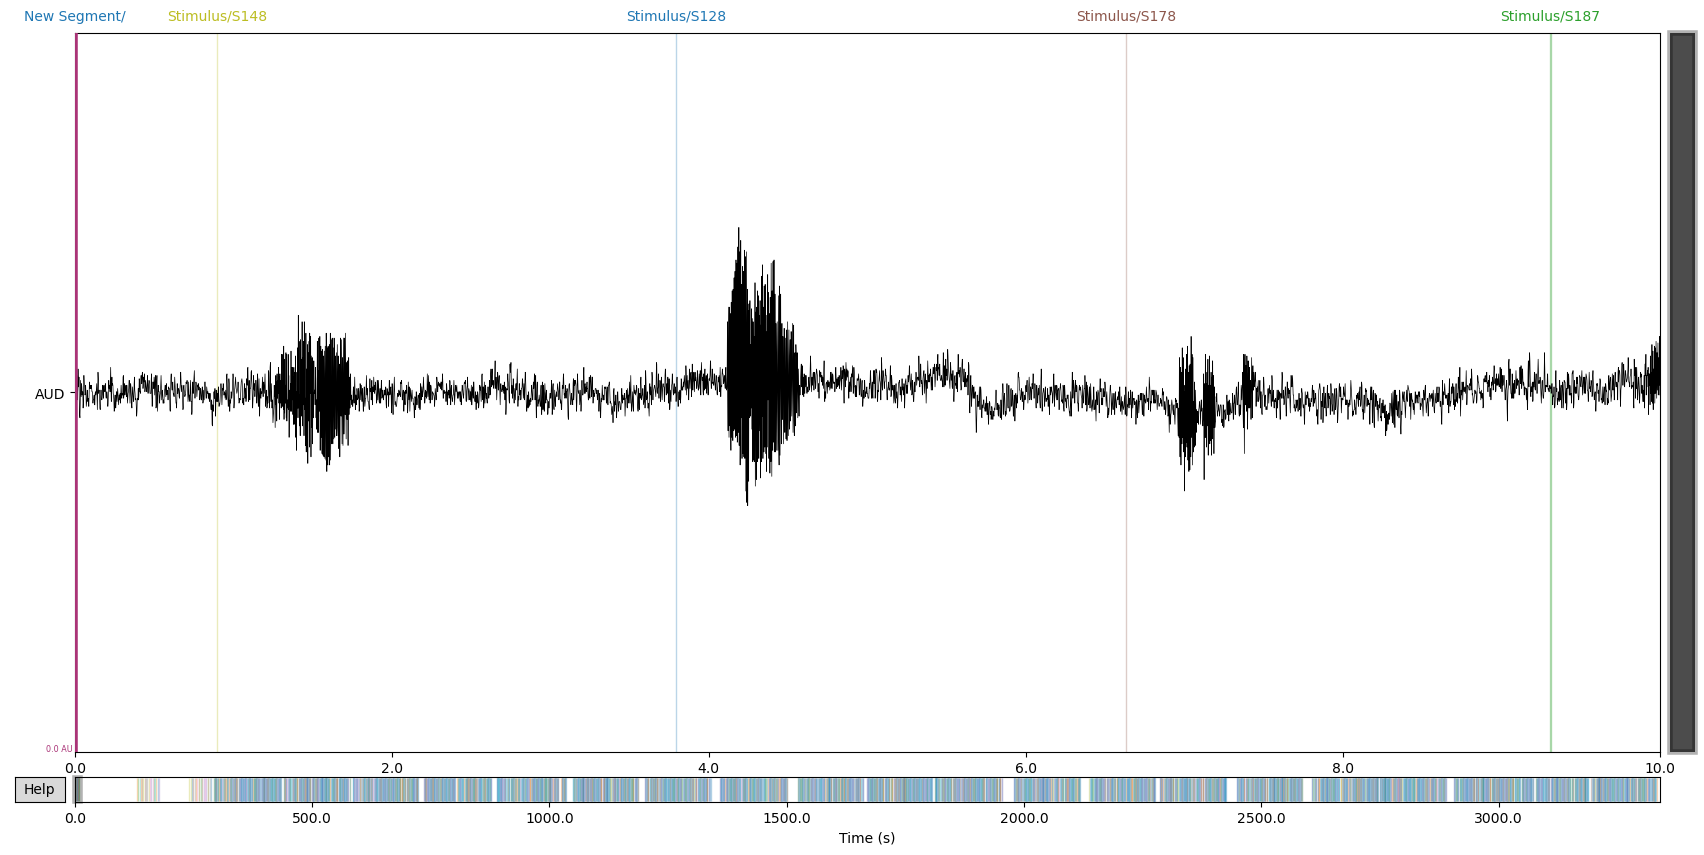

Closing raw-browser...
Channels marked as bad:
none


In [10]:
aud.plot()

### Sanity check (if # sound == # annotations

In [18]:
trigger=[11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46,
         51, 52, 53, 54, 55, 56, 61, 62, 63, 64, 65, 66, 71, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 86,
         111, 112, 113, 114, 115, 116, 121, 122, 123, 124, 125, 126, 131, 132, 133, 134, 135, 136, 141, 142, 143, 144, 145, 146,
         151, 152, 153, 154, 155, 156, 161, 162, 163, 164, 165, 166, 171, 172, 173, 174, 175, 176, 181, 182, 183, 184, 185, 186]

In [ ]:
ct=0
col=[]
for i in range(len(events)):
    
    if events[i][2] in trigger:
        col.append(events[i][2])
        ct+=1
len(col)

In [111]:
a=0
for i in range(len(aud.annotations)-1):
    if aud.annotations[i+1]['description']=="New Segment/":
        a+=1
print(a)

961


In [67]:
for i in range(len(aud.annotations)-1):
    if aud.annotations[i]['description'] !="New Segment/":
        if aud.annotations[i+1]['description'] !="New Segment/":
            print(aud.annotations[i]['description'], aud.annotations[i]['onset'])

Stimulus/S 28 62.472
Stimulus/S  2 129.054
Stimulus/S 77 132.17
Stimulus/S 78 135.052
Stimulus/S 57 137.918
Stimulus/S 37 140.85
Stimulus/S 48 143.602
Stimulus/S 18 146.276
Stimulus/S 17 148.966
Stimulus/S  1 150.754
Stimulus/S 38 153.934
Stimulus/S 68 156.616
Stimulus/S 67 159.568
Stimulus/S 27 162.332
Stimulus/S 58 165.2
Stimulus/S 88 168.15
Stimulus/S 47 170.934
Stimulus/S 87 173.566
Stimulus/S157 227.192
Stimulus/S128 230.034
Stimulus/S168 232.748
Stimulus/S187 235.666
Stimulus/S177 238.3
Stimulus/S188 241.198
Stimulus/S147 243.874
Stimulus/S127 246.666
Stimulus/S  1 247.434
Stimulus/S117 251.964
Stimulus/S118 254.856
Stimulus/S158 257.532
Stimulus/S138 260.396
Stimulus/S  1 261.166
Stimulus/S137 266.098
Stimulus/S178 269.048
Stimulus/S148 271.648
Stimulus/S167 274.414
Stimulus/S  1 284.418
Stimulus/S  1 290.582
Stimulus/S  1 298.25
Stimulus/S  1 361.364
Stimulus/S  1 392.832
Stimulus/S  1 464.112
Stimulus/S  1 482.144
Stimulus/S  1 496.678
Stimulus/S  1 505.86
Stimulus/S  1 537.42

In [73]:
for i in range(len(aud_shft)):
    if str(col[i]) in aud_shft[i][0]: pass
    else: print(i)

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350


### Shift events

In [80]:
aud_shft=[]

for i in range(len(aud.annotations)-1):
    if aud.annotations[i+1]['description']=="New Segment/": #New Segment/Sound/sound
        aud_shft.append([aud.annotations[i]['description'],aud.annotations[i]['onset'],aud.annotations[i+1]['onset']-aud.annotations[i]['onset']])
len(aud_shft)

961

In [81]:
events_shft = []
a=0

for i in range(len(events)-1):
    
    if events[i][2] in trigger:
        shft = aud_shft[a][2]
        a+=1
    else: shft = 0
        
    events_shft[i:i+1] = mne.event.shift_time_events(events[i:i+1], ids=None, tshift=shft, sfreq=reconst_raw.info['sfreq'])

In [82]:
arr = np.vstack(events_shft)

In [43]:
Eng = pd.read_excel("G:\My Drive\Research\Decoding\Psychopy\stimuli_Eng.xlsx")
Kor = pd.read_excel("G:\My Drive\Research\Decoding\Psychopy\stimuli_Kor.xlsx")

In [83]:
try:
    event_id={'RespYes': 1, 'RespNo': 2} # if all responses = yes
    
    for i in range(48):
        event_id[Eng["word"][i]] = Eng["trigger"][i] 
    
    for i in range(48):
        event_id[Kor["word"][i]] = Kor["trigger"][i] 
    
    epochs = mne.Epochs(reconst_raw, arr, event_id, tmin=-1, tmax=1, baseline=(None, 0.), preload=True, event_repeated='drop', )

except ValueError:
    event_id={'RespYes': 1}
    
    for i in range(48):
        event_id[Eng["word"][i]] = Eng["trigger"][i] 
    
    for i in range(48):
        event_id[Kor["word"][i]] = Kor["trigger"][i] 
    
    epochs = mne.Epochs(reconst_raw, arr, event_id, tmin=-1, tmax=1, baseline=(None, 0.), preload=True, event_repeated='drop')
    

#779, 780, 781, 784, 785: no epoch dropped
#782: 20 epochs dropped
#783: 44 epochs dropped

Not setting metadata
1055 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1055 events and 1001 original time points ...
44 bad epochs dropped


# Keep trials without responses

In [84]:
epochs_idx=[]

for i in range(len(epochs)-1):
    if epochs.events[i+1][2]!=1 and epochs.events[i+1][2]!=2:
        epochs_idx.append(i)

In [85]:
epochs_noresp = epochs[epochs_idx]

In [256]:
epochs_noresp

Number of events,960
Events,Eng_chopped1: 9Eng_chopped2: 9Eng_chopped3: 9Eng_chops1: 9Eng_chops2: 9Eng_chops3: 9Eng_dog1: 9Eng_dog2: 9Eng_dog3: 9Eng_dogs1: 9Eng_dogs2: 9Eng_dogs3: 9Eng_filled1: 9Eng_filled2: 9Eng_filled3: 9Eng_fills1: 9Eng_fills2: 9Eng_fills3: 9Eng_leaned1: 9Eng_leaned2: 9Eng_leaned3: 9Eng_leans1: 9Eng_leans2: 9Eng_leans3: 9Eng_lion1: 9Eng_lion2: 9Eng_lion3: 9Eng_lions1: 9Eng_lions2: 9Eng_lions3: 9Eng_owned1: 9Eng_owned2: 9Eng_owned3: 9Eng_owns1: 9Eng_owns2: 9Eng_owns3: 9Eng_rat1: 9Eng_rat2: 9Eng_rat3: 9Eng_rats1: 9Eng_rats2: 9Eng_rats3: 9Eng_swan1: 8Eng_swan2: 9Eng_swan3: 8Eng_swans1: 9Eng_swans2: 9Eng_swans3: 9Kor_chopped1: 9Kor_chopped2: 9Kor_chopped3: 9Kor_chops1: 9Kor_chops2: 9Kor_chops3: 9Kor_dog1: 10Kor_dog2: 9Kor_dog3: 9Kor_dogs1: 9Kor_dogs2: 9Kor_dogs3: 10Kor_filled1: 9Kor_filled2: 9Kor_filled3: 9Kor_fills1: 9Kor_fills2: 10Kor_fills3: 9Kor_leaned1: 9Kor_leaned2: 9Kor_leaned3: 9Kor_leans1: 10Kor_leans2: 9Kor_leans3: 9Kor_lion1: 9Kor_lion2: 9Kor_lion3: 9Kor_lions1: 9Kor_lions2: 9Kor_lions3: 9Kor_owned1: 9Kor_owned2: 9Kor_owned3: 10Kor_owns1: 9Kor_owns2: 9Kor_owns3: 9Kor_rat1: 9Kor_rat2: 10Kor_rat3: 9Kor_rats1: 9Kor_rats2: 9Kor_rats3: 9Kor_swan1: 9Kor_swan2: 9Kor_swan3: 9Kor_swans1: 9Kor_swans2: 9Kor_swans3: 9RespYes: 92
Time range,-0.200 – 1.000 sec
Baseline,-0.200 – 0.000 sec


In [86]:
epochs_noresp.save("G:\My Drive\Research\Decoding\EEG\R0783_epo.fif", overwrite=False)

In [21]:
epochs_noresp=mne.read_epochs("G:\My Drive\Research\Dissertation\EEG\R0779_2_epo.fif", preload=True)

Reading G:\My Drive\Research\Dissertation\EEG\R0779_2_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
906 matching events found
No baseline correction applied
0 projection items activated


In [59]:
epochs_noresp

Number of events,906
Events,Eng_chopped1: 9Eng_chopped2: 9Eng_chopped3: 9Eng_chops1: 8Eng_chops2: 9Eng_chops3: 9Eng_dog1: 9Eng_dog2: 9Eng_dog3: 9Eng_dogs1: 8Eng_dogs2: 7Eng_dogs3: 9Eng_filled1: 9Eng_filled2: 10Eng_filled3: 9Eng_fills1: 9Eng_fills2: 9Eng_fills3: 9Eng_leaned1: 9Eng_leaned2: 9Eng_leaned3: 8Eng_leans1: 9Eng_leans2: 8Eng_leans3: 8Eng_lion1: 9Eng_lion2: 9Eng_lion3: 9Eng_lions1: 9Eng_lions2: 7Eng_lions3: 8Eng_owned1: 9Eng_owned2: 8Eng_owned3: 10Eng_owns1: 9Eng_owns2: 9Eng_owns3: 8Eng_rat1: 9Eng_rat2: 9Eng_rat3: 9Eng_rats1: 9Eng_rats2: 9Eng_rats3: 8Eng_swan1: 9Eng_swan2: 8Eng_swan3: 8Eng_swans1: 9Eng_swans2: 9Eng_swans3: 9Kor_chopped1: 9Kor_chopped2: 9Kor_chopped3: 8Kor_chops1: 8Kor_chops2: 9Kor_chops3: 9Kor_dog1: 8Kor_dog2: 8Kor_dog3: 9Kor_dogs1: 9Kor_dogs2: 8Kor_dogs3: 8Kor_filled1: 7Kor_filled2: 8Kor_filled3: 9Kor_fills1: 9Kor_fills2: 9Kor_fills3: 9Kor_leaned1: 8Kor_leaned2: 8Kor_leaned3: 7Kor_leans1: 10Kor_leans2: 9Kor_leans3: 9Kor_lion1: 8Kor_lion2: 9Kor_lion3: 7Kor_lions1: 9Kor_lions2: 9Kor_lions3: 9Kor_owned1: 7Kor_owned2: 8Kor_owned3: 10Kor_owns1: 8Kor_owns2: 8Kor_owns3: 9Kor_rat1: 8Kor_rat2: 9Kor_rat3: 7Kor_rats1: 9Kor_rats2: 9Kor_rats3: 8Kor_swan1: 8Kor_swan2: 8Kor_swan3: 9Kor_swans1: 8Kor_swans2: 7Kor_swans3: 7RespYes: 85
Time range,-1.000 – 1.000 sec
Baseline,-1.000 – 0.000 sec


# Visualize epochs

In [35]:
epochs_Engrat = epochs_noresp["Eng_rats1", "Eng_rats2", "Eng_rats3"]

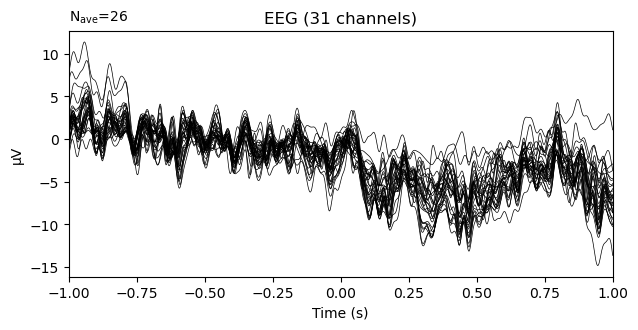

In [36]:
#picks=["Pz", "Cz", "Fz", "Oz"]
#epochs_Engdog.average().plot(picks=picks)
epochs_Engrat.average().plot()

In [323]:
epochs_Engrat.get_data().shape

(27, 33, 601)

In [27]:
epochs_Engdog.plot_image(picks=['Fz']);

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [246]:
epochs_Kordog = epochs_noresp["Kor_dog1", "Kor_dog2", "Kor_dog3"]

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


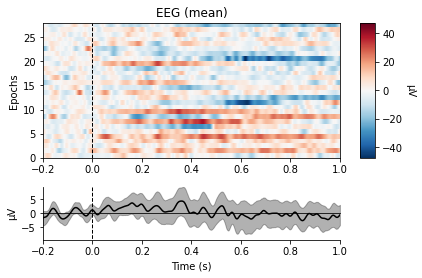

In [248]:
epochs_Kordog.plot_image(combine='mean');

# MVPA

In [37]:
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)

from skopt import BayesSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Models
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [175]:
## dog-rat
target_names=['dog', 'rat']

# Define epochs
dog_Eng = epochs_noresp["Eng_dog1","Eng_dog2", "Eng_dog3", "Eng_dogs1", "Eng_dogs2", "Eng_dogs3"]
rat_Eng = epochs_noresp["Eng_rat1", "Eng_rat2", "Eng_rat3", "Eng_rats1", "Eng_rats2", "Eng_rats3"]

dog_Eng12 = epochs_noresp["Eng_dog1","Eng_dog2" "Eng_dogs1", "Eng_dogs2"]
rat_Eng12 = epochs_noresp["Eng_rat1", "Eng_rat2", "Eng_rats1", "Eng_rats2"]

dog_Eng3 = epochs_noresp["Eng_dog3", "Eng_dogs3"]
rat_Eng3 = epochs_noresp["Eng_rat3", "Eng_rats3"]

dog_Eng23 = epochs_noresp["Eng_dog3","Eng_dog2" "Eng_dogs3", "Eng_dogs2"]
rat_Eng23 = epochs_noresp["Eng_rat3", "Eng_rat2", "Eng_rats3", "Eng_rats2"]

dog_Eng1 = epochs_noresp["Eng_dog1", "Eng_dogs1"]
rat_Eng1 = epochs_noresp["Eng_rat1", "Eng_rats1"]

#dog_Eng = epochs_noresp["Eng_dog1","Eng_dog2", "Eng_dog3"]
#rat_Eng = epochs_noresp["Eng_rat1", "Eng_rat2", "Eng_rat3"]

dog_Kor = epochs_noresp["Kor_dog1","Kor_dog2", "Kor_dog3", "Kor_dogs1", "Kor_dogs2", "Kor_dogs3"]
rat_Kor = epochs_noresp["Kor_rat1", "Kor_rat2", "Kor_rat3", "Kor_rats1", "Kor_rats2", "Kor_rats3"]

In [113]:
## Number
target_names=['singular', 'plural']

# Define epochs
sg_Eng1 = epochs_noresp["Eng_dog1","Eng_dog2", "Eng_dog3", "Eng_rat1", "Eng_rat2", "Eng_rat3", "Eng_swan1","Eng_swan2", "Eng_swan3", "Eng_lion1", "Eng_lion2", "Eng_lion3"]
pl_Eng1 = epochs_noresp["Eng_dogs1", "Eng_dogs2", "Eng_dogs3", "Eng_rats1", "Eng_rats2", "Eng_rats3", "Eng_swans1", "Eng_swans2", "Eng_swans3", "Eng_lions1", "Eng_lions2", "Eng_lions3"]

sg_Eng = epochs_noresp["Eng_swan1","Eng_swan2", "Eng_swan3", "Eng_lion1", "Eng_lion2", "Eng_lion3"]
pl_Eng = epochs_noresp["Eng_dogs1", "Eng_dogs2", "Eng_dogs3", "Eng_rats1", "Eng_rats2", "Eng_rats3"]

sg_Kor1 = epochs_noresp["Kor_dog1","Kor_dog2","Kor_dog3", "Kor_rat1","Kor_rat2", "Kor_rat3", "Kor_lion1", "Kor_lion2", "Kor_lion3","Kor_swan1","Kor_swan2", "Kor_swan3"]
pl_Kor1 = epochs_noresp["Kor_dogs1", "Kor_dogs2", "Kor_dogs3", "Kor_rats1", "Kor_rats2", "Kor_rats3", "Kor_lions1", "Kor_lions2", "Kor_lions3","Kor_swans1","Kor_swans2", "Kor_swans3"]

sg_Kor = epochs_noresp["Kor_lion1", "Kor_lion2", "Kor_lion3","Kor_swan1","Kor_swan2", "Kor_swan3"]
pl_Kor = epochs_noresp["Kor_dogs1", "Kor_dogs2", "Kor_dogs3", "Kor_rats1", "Kor_rats2", "Kor_rats3"]

In [106]:
## Tense
target_names=['present', 'past']

# Define epochs
pr_Eng = epochs_noresp["Eng_chops1","Eng_chops2", "Eng_chops3", "Eng_leans1","Eng_leans2", "Eng_leans3", "Eng_owns1", "Eng_owns2", "Eng_owns3", "Eng_fills1", "Eng_fills2", "Eng_fills3"]
pt_Eng = epochs_noresp["Eng_chopped1","Eng_chopped2", "Eng_chopped3","Eng_leaned1","Eng_leaned2","Eng_leaned3","Eng_owned1", "Eng_owned2","Eng_owned3","Eng_filled1","Eng_filled2", "Eng_filled3"]

pr_Kor = epochs_noresp["Kor_chops1","Kor_chops2", "Kor_chops3", "Kor_leans1","Kor_leans2", "Kor_leans3", "Kor_owns1", "Kor_owns2", "Kor_owns3", "Kor_fills1", "Kor_fills2", "Kor_fills3"]
pt_Kor = epochs_noresp["Kor_chopped1","Kor_chopped2", "Kor_chopped3","Kor_leaned1","Kor_leaned2","Kor_leaned3","Kor_owned1", "Kor_owned2","Kor_owned3","Kor_filled1","Kor_filled2", "Kor_filled3"]

In [42]:
Eng = pd.read_excel("G:\My Drive\Research\Decoding\Psychopy\stimuli_Eng.xlsx")
Kor = pd.read_excel("G:\My Drive\Research\Decoding\Psychopy\stimuli_Kor.xlsx")
events = []
for i in range(48):
    events.append(Eng["word"][i])
    
for i in range(48):
    events.append(Kor["word"][i])

In [43]:
import re
r1 = re.compile("Eng.*dog")
r2 = re.compile("Eng.*rat")

l1 = list(filter(r1.match, events))
l2 = list(filter(r2.match, events))

In [310]:
# Define train data
train1 = epochs_noresp[l1]
train2 = epochs_noresp[l2]

#train1 = sg_Kor1
#train2 = pl_Kor1

# Prepare train data
trainx_1 = train1.get_data()
trainx_2 = train2.get_data()
trainx_1=trainx_1[:,:,100:]; #from 0ms
trainx_2=trainx_2[:,:,100:];
trainx = np.concatenate((trainx_1, trainx_2), axis=0)

trainy_1 = train1.events[:,2]
trainy_1[trainy_1 > 0] = 1
trainy_2 = train2.events[:,2]
trainy_2[trainy_2 > 0] = 2

trainy = np.concatenate((trainy_1, trainy_2), axis=0)

In [311]:
train_data, test_data, train_labels, test_labels = train_test_split(trainx, trainy, test_size=0.2, random_state=42)

In [333]:
clf_svm_pip.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [ ]:
clf_svm_pip = make_pipeline(Vectorizer(), StandardScaler(), svm.SVC(random_state=42))
parameters = {
        'svc__C': (1e-6, 1e+6, 'log-uniform'),
        'svc__gamma': (1e-6, 1e+1, 'log-uniform'),
        'svc__degree': (1, 8),  # integer valued parameter
        'svc__kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    }
    
gs_cv_svm = BayesSearchCV(clf_svm_pip, parameters, n_iter=32, cv=3)
gs_cv_svm.fit(train_data, train_labels)

print(gs_cv_svm.best_params_)
print(gs_cv_svm.best_score_)

In [319]:
clf_svm_pip = make_pipeline(Vectorizer(), StandardScaler(), svm.SVC(random_state=42))
parameters = {'svc__kernel':['linear', 'rbf', 'sigmoid'], 'svc__C':[0.0001, 0.001]}

gs_cv_svm = GridSearchCV(clf_svm_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=5), return_train_score=True)
gs_cv_svm.fit(train_data, train_labels)

print(gs_cv_svm.best_params_)
print(gs_cv_svm.best_score_)

{'svc__C': 0.0001, 'svc__kernel': 'rbf'}
0.5117647058823529


In [178]:
scores = cross_val_score(gs_cv_svm, train_data, train_labels, cv=StratifiedKFold(n_splits=5))
for i in range(len(scores)):   
    print('Accuracy of ' + str(i+1) + 'th fold is ' + str(scores[i]) + '\n')
print('The average CV accuracy is ', sum(scores)/len(scores))

Accuracy of 1th fold is 0.5

Accuracy of 2th fold is 0.5555555555555556

Accuracy of 3th fold is 0.5882352941176471

Accuracy of 4th fold is 0.6470588235294118

Accuracy of 5th fold is 0.35294117647058826

The average CV accuracy is  0.5287581699346405


In [279]:
t1 = re.compile("Eng.*dog")
t2 = re.compile("Eng.*rat")

tl1 = list(filter(t1.match, events))
tl2 = list(filter(t2.match, events))

In [280]:
# Define test data

test1 = epochs_noresp[tl1]
test2 = epochs_noresp[tl2]
#test1 = sg_Eng1
#test2 = pl_Eng1

# Prepare test data
testx_1 = test1.get_data()
testx_2 = test2.get_data()
testx_1=testx_1[:,:,100:]; #from 0ms
testx_2=testx_2[:,:,100:];
test_data = np.concatenate((testx_1, testx_2), axis=0)

testy_1 = test1.events[:,2]
testy_1[testy_1 > 0] = 1
testy_2 = test2.events[:,2]
testy_2[testy_2 > 0] = 2

test_labels = np.concatenate((testy_1, testy_2), axis=0)

In [320]:
#Prediction
predictions_svm = gs_cv_svm.predict(test_data)

#Evaluate
report_svm = classification_report(test_labels, predictions_svm, target_names=["c1", "c2"])
print('SVM Clasification Report:\n {}'.format(report_svm))

acc_svm = accuracy_score(test_labels, predictions_svm)
print("Accuracy of SVM model: {:.2f}".format(acc_svm))
    
precision_svm,recall_svm,fscore_svm,support_svm=precision_recall_fscore_support(test_labels,predictions_svm,average='macro')
print('Precision: {:.2f}, Recall: {:.2f}, f1-score:{:.2f}'.format(precision_svm,recall_svm,fscore_svm))
    

SVM Clasification Report:
               precision    recall  f1-score   support

          c1       0.45      1.00      0.62        10
          c2       0.00      0.00      0.00        12

    accuracy                           0.45        22
   macro avg       0.23      0.50      0.31        22
weighted avg       0.21      0.45      0.28        22

Accuracy of SVM model: 0.45
Precision: 0.23, Recall: 0.50, f1-score:0.31


C:\Users\LG\anaconda3\envs\eelbrain\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LG\anaconda3\envs\eelbrain\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LG\anaconda3\envs\eelbrain\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LG\anaconda3\

# Temporal decoding

In [356]:
time_gen = GeneralizingEstimator(gs_cv_svm, scoring='roc_auc', n_jobs=1, verbose=True)
time_gen.fit(train_data, train_labels)

<GeneralizingEstimator(base_estimator=GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer',
                                        <mne.decoding.transformer.Vectorizer object at 0x000001501DFEEA00>),
                                       ('st...c__kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy'),
           n_jobs=1, scoring='roc_auc', fitted with 501 estimators, fitted with 501 estimators>

In [357]:
scores = time_gen.score(test_data, test_labels);

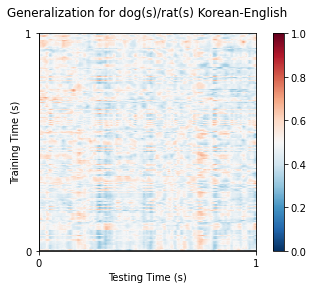

In [358]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
im = ax.matshow(scores, vmin=0, vmax=1., cmap='RdBu_r', origin='lower',
                extent=epochs.times[[500, -1, 500, -1]])
ax.axhline(0., color='k')
ax.axvline(0., color='k')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Generalization for dog(s)/rat(s) Korean-English')
plt.colorbar(im, ax=ax)
plt.show()